In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
X = np.loadtxt("data_clustering.txt", delimiter=",")

In [3]:
num_clusters = 5

## Initial data distribution

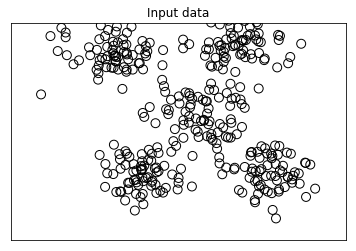

In [6]:
plt.figure()
plt.scatter(X[:,0], X[:,1], marker="o", facecolors="none", edgecolors="black", s=80)
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,0].min()-1, X[:,0].max()+1
plt.title("Input data")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## k-Means++ algorithm

In [7]:
#creating Kmeans object
kmeans = KMeans(init="k-means++", n_clusters=num_clusters, n_init=10)

In [8]:
#learning clustering model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
#grid space
step_size = 0.01

In [18]:
#setting grid
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,0].min()-1, X[:,0].max()+1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

In [35]:
#predicting output label of all the points on grid
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

In [39]:
#coloring #reshapeing into original shape before ravel() function
output = output.reshape(x_vals.shape)

In [44]:
cluster_centers = kmeans.cluster_centers_

In [45]:
cluster_centers

array([[ 2.97253521,  1.97267606],
       [ 4.92605634,  5.0184507 ],
       [ 1.98385714,  8.04942857],
       [ 7.09588235,  2.01735294],
       [ 6.10842857,  8.58428571]])

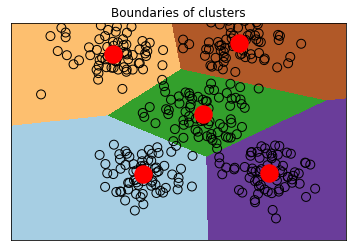

In [50]:
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
          extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
          cmap=plt.cm.Paired, aspect="auto", origin="lower")

#data points
plt.scatter(X[:,0], X[:,1], marker="o", facecolors="none", edgecolors="black", s=80)

#centroid
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
           marker="o", s=210, linewidths=4, color="red",
           zorder=12, facecolors="red")
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,0].min()-1, X[:,0].max()+1
plt.title("Boundaries of clusters")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()